In [1]:
%pip install loompy
%pip install scvelo 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns

C:\Users\navarrou\.conda\envs\scanpy_env\Lib\site-packages\anndata\utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
C:\Users\navarrou\.conda\envs\scanpy_env\Lib\site-packages\anndata\utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
C:\Users\navarrou\.conda\envs\scanpy_env\Lib\site-packages\anndata\utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
C:\Users\navarrou\.conda\envs\scanpy_env\Lib\site-packages\anndata\utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
C:\Users\navarrou\.conda\envs\scanpy_env\Lib\site-packages\anndata\utils.py:429: FutureWarning: Importing read_mtx from `annda

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
#this is just for adjusting parameters that might be useful for future debugging for instance
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor="white")

C:\Users\navarrou\.conda\envs\scanpy_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.10.3 anndata==0.11.1 umap==0.5.7 numpy==2.0.2 scipy==1.14.1 pandas==2.2.2 scikit-learn==1.5.2 statsmodels==0.14.4 igraph==0.11.8 pynndescent==0.5.13


In [5]:
import tarfile
gz_path = r"C:/Users/navarrou/Documents/scRNAseq/databases/pbmc3k_filtered_gene_bc_matrices.tar.gz"

with tarfile.open(gz_path, "r:gz") as tar:
    tar.extractall(path=r"C:/Users/navarrou/Documents/RNA seq practice/databases/")

C:\Users\navarrou\AppData\Local\Temp\ipykernel_8100\3036201649.py:5: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=r"C:/Users/navarrou/Documents/RNA seq practice/databases/")


In [6]:
adata = sc.read_10x_mtx(
    "C:/Users/navarrou/Documents/scRNAseq/databases/filtered_gene_bc_matrices/hg19", 
    var_names="gene_symbols",  # Use gene symbols for the variable names
    cache=True,  # Write a cache file for faster subsequent reading (a cache is a temporary file created in the scanpy format ))
)
adata

... reading from cache file cache\C-Users-navarrou-Documents-scRNAseq-databases-filtered_gene_bc_matrices-hg19-matrix.h5ad


AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [7]:
adata.var_names

Index(['MIR1302-10', 'FAM138A', 'OR4F5', 'RP11-34P13.7', 'RP11-34P13.8',
       'AL627309.1', 'RP11-34P13.14', 'RP11-34P13.9', 'AP006222.2',
       'RP4-669L17.10',
       ...
       'KIR3DL2-1', 'AL590523.1', 'CT476828.1', 'PNRC2-1', 'SRSF10-1',
       'AC145205.1', 'BAGE5', 'CU459201.1', 'AC002321.2', 'AC002321.1'],
      dtype='object', length=32738)

In [8]:
gene_name = 'MIR1302-10'
if gene_name in adata.var_names:
    print(f"Gene {gene_name} exists in the dataset!")
else:
    print(f"Gene {gene_name} does not exist in the dataset.")

Gene MIR1302-10 exists in the dataset!


In [9]:
adata.var_names_make_unique()

In [10]:
adata.obs_names

Index(['AAACATACAACCAC-1', 'AAACATTGAGCTAC-1', 'AAACATTGATCAGC-1',
       'AAACCGTGCTTCCG-1', 'AAACCGTGTATGCG-1', 'AAACGCACTGGTAC-1',
       'AAACGCTGACCAGT-1', 'AAACGCTGGTTCTT-1', 'AAACGCTGTAGCCA-1',
       'AAACGCTGTTTCTG-1',
       ...
       'TTTCAGTGTCACGA-1', 'TTTCAGTGTCTATC-1', 'TTTCAGTGTGCAGT-1',
       'TTTCCAGAGGTGAG-1', 'TTTCGAACACCTGA-1', 'TTTCGAACTCTCAT-1',
       'TTTCTACTGAGGCA-1', 'TTTCTACTTCCTCG-1', 'TTTGCATGAGAGGC-1',
       'TTTGCATGCCTCAC-1'],
      dtype='object', length=2700)

In [11]:
adata.obs

Empty DataFrame
Columns: []
Index: [AAACATACAACCAC-1, AAACATTGAGCTAC-1, AAACATTGATCAGC-1, AAACCGTGCTTCCG-1, AAACCGTGTATGCG-1, AAACGCACTGGTAC-1, AAACGCTGACCAGT-1, AAACGCTGGTTCTT-1, AAACGCTGTAGCCA-1, AAACGCTGTTTCTG-1, AAACTTGAAAAACG-1, AAACTTGATCCAGA-1, AAAGAGACGAGATA-1, AAAGAGACGCGAGA-1, AAAGAGACGGACTT-1, AAAGAGACGGCATT-1, AAAGATCTGGGCAA-1, AAAGCAGAAGCCAT-1, AAAGCAGATATCGG-1, AAAGCCTGTATGCG-1, AAAGGCCTGTCTAG-1, AAAGTTTGATCACG-1, AAAGTTTGGGGTGA-1, AAAGTTTGTAGAGA-1, AAAGTTTGTAGCGT-1, AAATCAACAATGCC-1, AAATCAACACCAGT-1, AAATCAACCAGGAG-1, AAATCAACCCTATT-1, AAATCAACGGAAGC-1, AAATCAACTCGCAA-1, AAATCATGACCACA-1, AAATCCCTCCACAA-1, AAATCCCTGCTATG-1, AAATGTTGAACGAA-1, AAATGTTGCCACAA-1, AAATGTTGTGGCAT-1, AAATTCGAAGGTTC-1, AAATTCGAATCACG-1, AAATTCGAGCTGAT-1, AAATTCGAGGAGTG-1, AAATTCGATTCTCA-1, AAATTGACACGACT-1, AAATTGACTCGCTC-1, AACAAACTCATTTC-1, AACAAACTTTCGTT-1, AACAATACGACGAG-1, AACACGTGCAGAGG-1, AACACGTGGAAAGT-1, AACACGTGGAACCT-1, AACACGTGGCTACA-1, AACACGTGTACGAC-1, AACAGCACAAGAGT-1, AACATTGATGGGAG-1, AACCAGTGATACCG-1, AACCCAGATCGCTC-1, AACCGATGCTCCCA-1, AACCGATGGTCATG-1, AACCGATGTTCTAC-1, AACCGCCTAGCGTT-1, AACCGCCTCTACGA-1, AACCTACTGTGAGG-1, AACCTACTGTGTTG-1, AACCTTACGAGACG-1, AACCTTACGCGAGA-1, AACCTTACTAACGC-1, AACCTTTGGACGGA-1, AACCTTTGTACGCA-1, AACGCAACAAGTAG-1, AACGCATGACCCAA-1, AACGCATGCCTTCG-1, AACGCATGTACTTC-1, AACGCCCTCGGGAA-1, AACGCCCTCGTACA-1, AACGCCCTGCTTAG-1, AACGCCCTGGCATT-1, AACGTCGAGTATCG-1, AACGTGTGAAAGCA-1, AACGTGTGGCGGAA-1, AACGTGTGTCCAAG-1, AACGTGTGTGCTTT-1, AACTACCTTAGAGA-1, AACTCACTCAAGCT-1, AACTCACTTGGAGG-1, AACTCGGAAAGTGA-1, AACTCGGAAGGTCT-1, AACTCTTGCAGGAG-1, AACTGTCTCCCTTG-1, AACTTGCTACGCTA-1, AACTTGCTGGGACA-1, AAGAACGAGTGTTG-1, AAGAAGACGTAGGG-1, AAGACAGAAGTCTG-1, AAGACAGAGGATCT-1, AAGACAGATTACCT-1, AAGAGATGGGTAGG-1, AAGATGGAAAACAG-1, AAGATGGAGAACTC-1, AAGATGGAGATAAG-1, AAGATTACAACCTG-1, ...]

[2700 rows x 0 columns]

normalizing counts per cell
    finished (0:00:00)


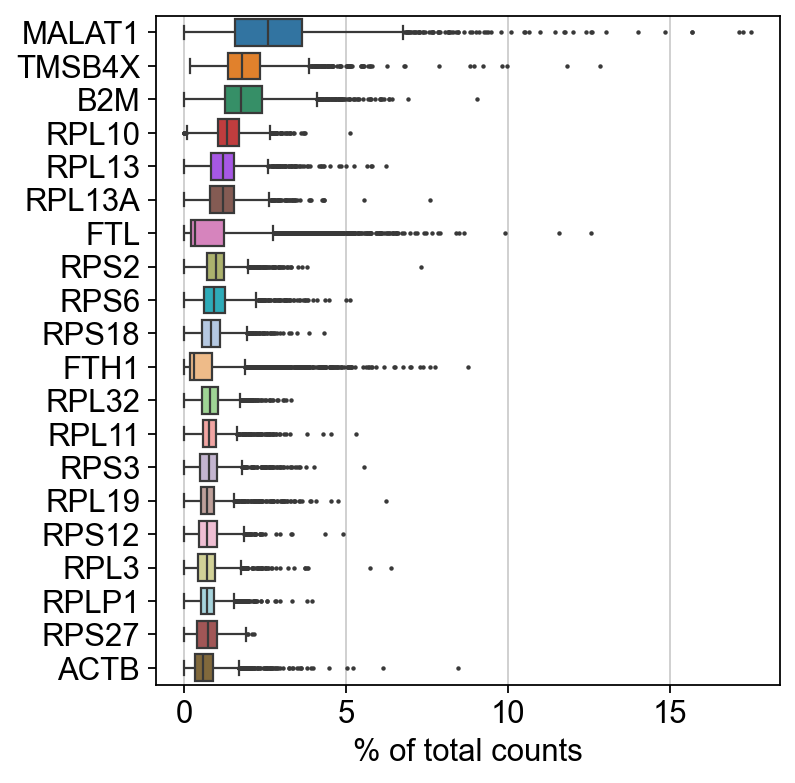

In [12]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [13]:
#filtering - default numbers/ what is the real order? or is there even one?
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 19024 genes that are detected in less than 3 cells


In [14]:
#looking at mithocondrial rna and filtering out
adata.var["mt"] = adata.var_names.str.startswith("MT-")#Annotate the group of mitocondrial genes as MT
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))#ribosomal genes
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")#hemoglobin genes
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)
adata.obs

n_genes  n_genes_by_counts  log1p_n_genes_by_counts  \
AAACATACAACCAC-1      781                779                 6.659294   
AAACATTGAGCTAC-1     1352               1352                 7.210080   
AAACATTGATCAGC-1     1131               1129                 7.029973   
AAACCGTGCTTCCG-1      960                960                 6.867974   
AAACCGTGTATGCG-1      522                521                 6.257668   
...                   ...                ...                      ...   
TTTCGAACTCTCAT-1     1155               1153                 7.050989   
TTTCTACTGAGGCA-1     1227               1224                 7.110696   
TTTCTACTTCCTCG-1      622                622                 6.434547   
TTTGCATGAGAGGC-1      454                452                 6.115892   
TTTGCATGCCTCAC-1      724                723                 6.584791   

                  total_counts  log1p_total_counts  \
AAACATACAACCAC-1        2419.0            7.791523   
AAACATTGAGCTAC-1        4903.0            8.497807   
AAACATTGATCAGC-1        3147.0            8.054523   
AAACCGTGCTTCCG-1        2639.0            7.878534   
AAACCGTGTATGCG-1         980.0            6.888573   
...                        ...                 ...   
TTTCGAACTCTCAT-1        3459.0            8.149024   
TTTCTACTGAGGCA-1        3443.0            8.144389   
TTTCTACTTCCTCG-1        1684.0            7.429521   
TTTGCATGAGAGGC-1        1022.0            6.930495   
TTTGCATGCCTCAC-1        1984.0            7.593374   

                  pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACATACAACCAC-1                   47.788342                    63.331955   
AAACATTGAGCTAC-1                   45.502753                    61.023863   
AAACATTGATCAGC-1                   41.340960                    53.829044   
AAACCGTGCTTCCG-1                   39.029936                    52.898825   
AAACCGTGTATGCG-1                   44.897959                    55.714286   
...                                      ...                          ...   
TTTCGAACTCTCAT-1                   39.259902                    52.558543   
TTTCTACTGAGGCA-1                   37.322103                    51.960500   
TTTCTACTTCCTCG-1                   45.783848                    61.638955   
TTTGCATGAGAGGC-1                   48.140900                    62.524462   
TTTGCATGCCTCAC-1                   46.572581                    61.995968   

                  pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACATACAACCAC-1                    75.031005                    88.466308   
AAACATTGAGCTAC-1                    71.813176                    82.622884   
AAACATTGATCAGC-1                    65.490944                    80.012711   
AAACCGTGCTTCCG-1                    66.691929                    82.569155   
AAACCGTGTATGCG-1                    67.244898                    97.857143   
...                                       ...                          ...   
TTTCGAACTCTCAT-1                    65.799364                    81.121711   
TTTCTACTGAGGCA-1                    63.955852                    78.971827   
TTTCTACTTCCTCG-1                    74.940618                    92.755344   
TTTGCATGAGAGGC-1                    75.342466                   100.000000   
TTTGCATGCCTCAC-1                    73.639113                    88.760081   

                  total_counts_mt  log1p_total_counts_mt  pct_counts_mt  \
AAACATACAACCAC-1             73.0               4.304065       3.017776   
AAACATTGAGCTAC-1            186.0               5.231109       3.793596   
AAACATTGATCAGC-1             28.0               3.367296       0.889736   
AAACCGTGCTTCCG-1             46.0               3.850147       1.743085   
AAACCGTGTATGCG-1             12.0               2.564949       1.224490   
...                           ...                    ...            ...   
TTTCGAACTCTCAT-1             73.0               4.304065       2.110436   
TTTCTACTGAGGCA-1             3

In [15]:
mito_genes = adata.var_names[adata.var["ribo"]] #to see the actual gene names of mitoc
print("Mitochondrial genes:", mito_genes)

Mitochondrial genes: Index(['RPL22', 'RPL11', 'RPS6KA1', 'RPS8', 'RPL5', 'RPS27', 'RPS10P7',
       'RPS6KC1', 'RPS7', 'RPS27A', 'RPL31', 'RPL37A', 'RPL32', 'RPL15',
       'RPSA', 'RPL14', 'RPL29', 'RPL24', 'RPL22L1', 'RPL39L', 'RPL35A',
       'RPL9', 'RPL34-AS1', 'RPL34', 'RPS3A', 'RPL37', 'RPS23', 'RPS14',
       'RPL26L1', 'RPS18', 'RPS10', 'RPL10A', 'RPL7L1', 'RPS12', 'RPS6KA2',
       'RPS6KA3', 'RPS4X', 'RPL36A', 'RPL39', 'RPL10', 'RPS20', 'RPL7',
       'RPL30', 'RPL8', 'RPS6', 'RPL35', 'RPL12', 'RPL7A', 'RPS24', 'RPLP2',
       'RPL27A', 'RPS13', 'RPS6KA4', 'RPS6KB2', 'RPS3', 'RPS25', 'RPS26',
       'RPL41', 'RPL6', 'RPLP0', 'RPL21', 'RPS29', 'RPL36AL', 'RPS6KL1',
       'RPS6KA5', 'RPS27L', 'RPL4', 'RPLP1', 'RPS17', 'RPS17L', 'RPS2',
       'RPS15A', 'RPL13', 'RPL26', 'RPL23A', 'RPL23', 'RPL19', 'RPL27',
       'RPS6KB1', 'RPL38', 'RPL17', 'RPS21', 'RPS15', 'RPL36', 'RPS28',
       'RPL18A', 'RPSAP58', 'RPS16', 'RPS19', 'RPL18', 'RPL13A', 'RPS11',
       'RPS9', 'RPL28', 'R

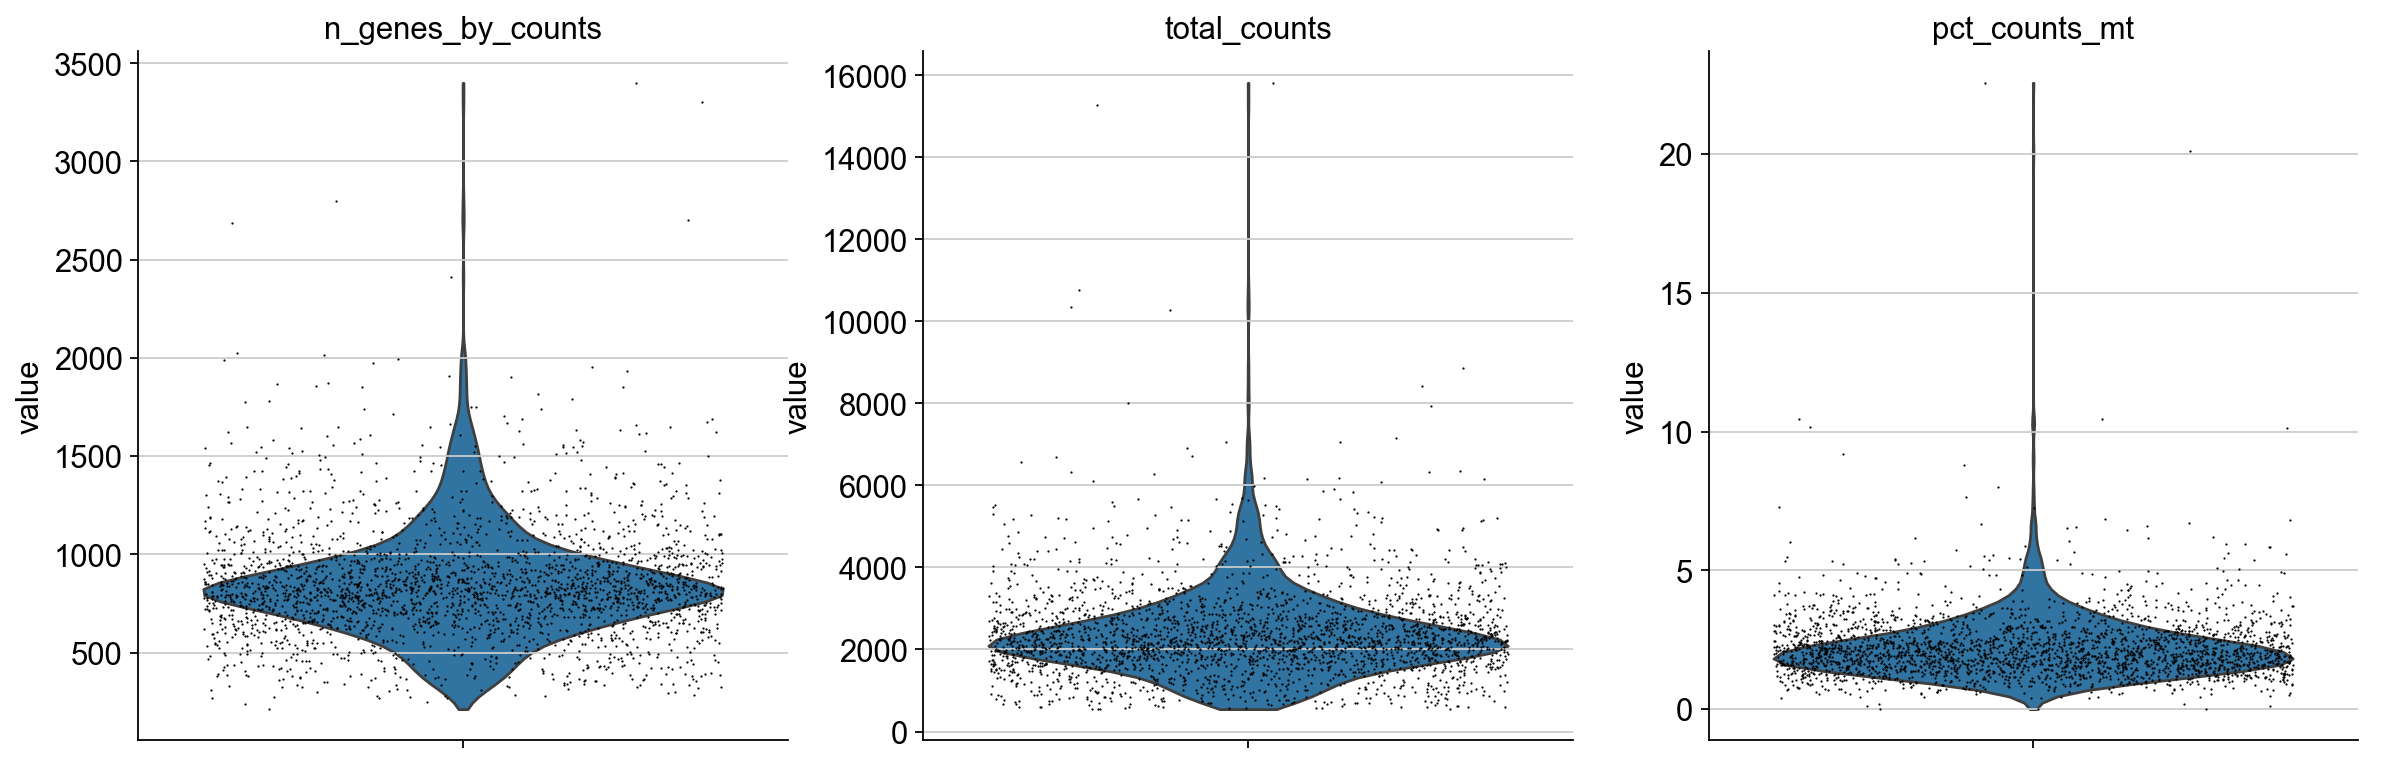

In [16]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

In [18]:
sc.pl.histogram(adata, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(adata, x="total_counts", y="n_genes_by_counts")


AttributeError: module 'scanpy.plotting' has no attribute 'histogram'

In [19]:
sc.pl.hist(adata, x='total_counts', y='pct_counts_mt', color='total_counts')

AttributeError: module 'scanpy.plotting' has no attribute 'hist'

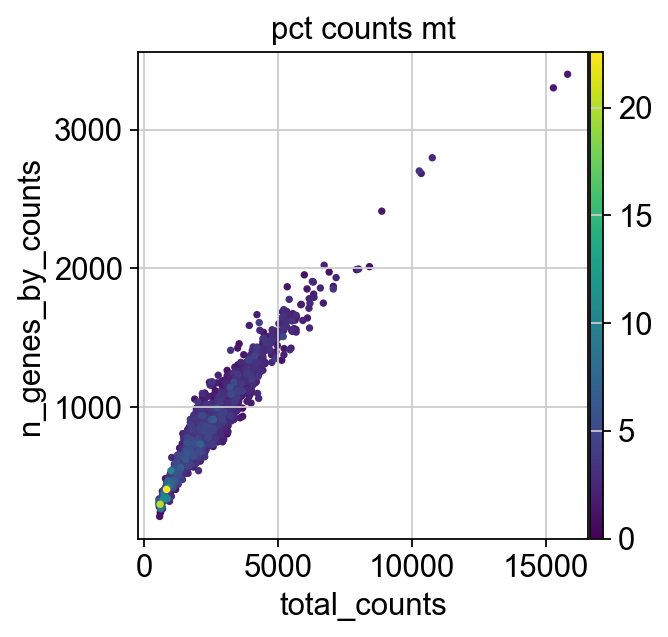

In [20]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [21]:
adata = adata[adata.obs.n_genes_by_counts < 2000, :]
adata = adata[adata.obs.pct_counts_mt < 10, :]
#this removes the cells that have too many mitocondrial genes expressed or too many total counts. however, this can change at a later stage
#what it looks like poor QC metrics, could be an actual biological setting

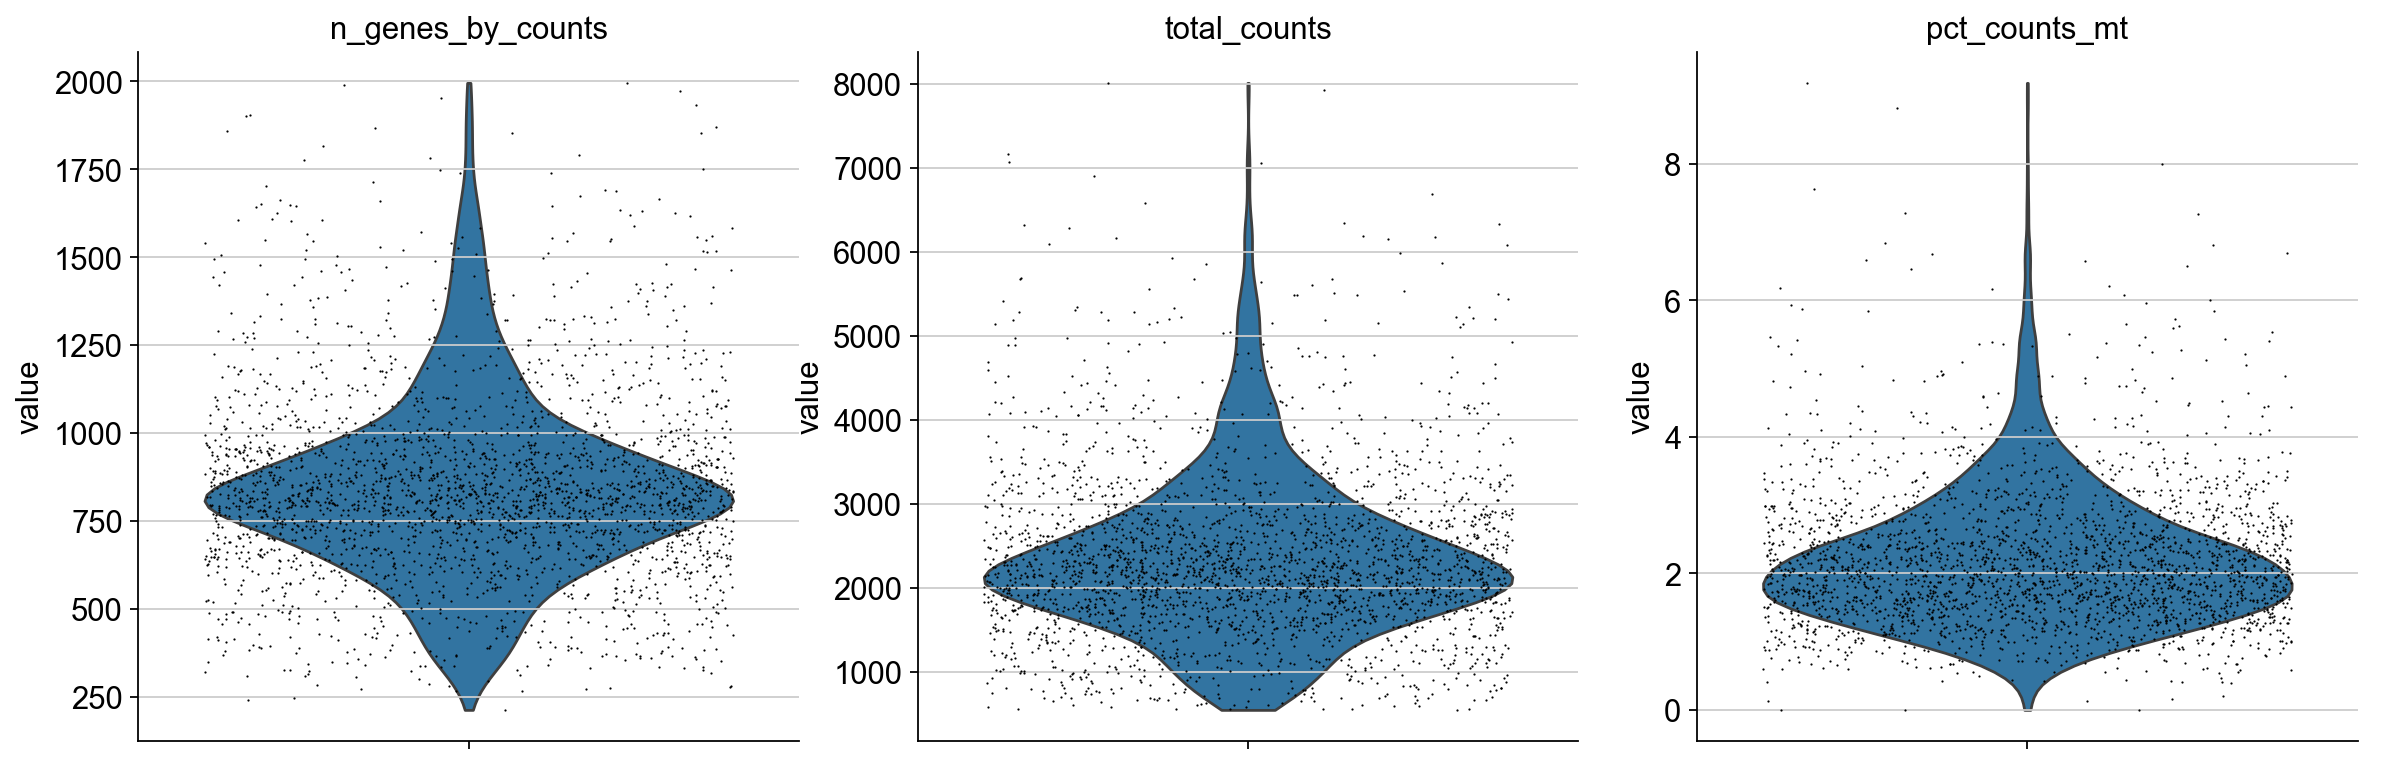

In [22]:
sc.pl.violin(adata, ['n_genes_by_counts','total_counts','pct_counts_mt'], jitter=0.4, multi_panel=True)

In [23]:
#now we normalize the data to 10 000 reads per cell so that the counts can be comparable among cells
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


C:\Users\navarrou\.conda\envs\scanpy_env\Lib\site-packages\scanpy\preprocessing\_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [24]:
sc.pp.log1p(adata)

In [25]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


Is this what we want?

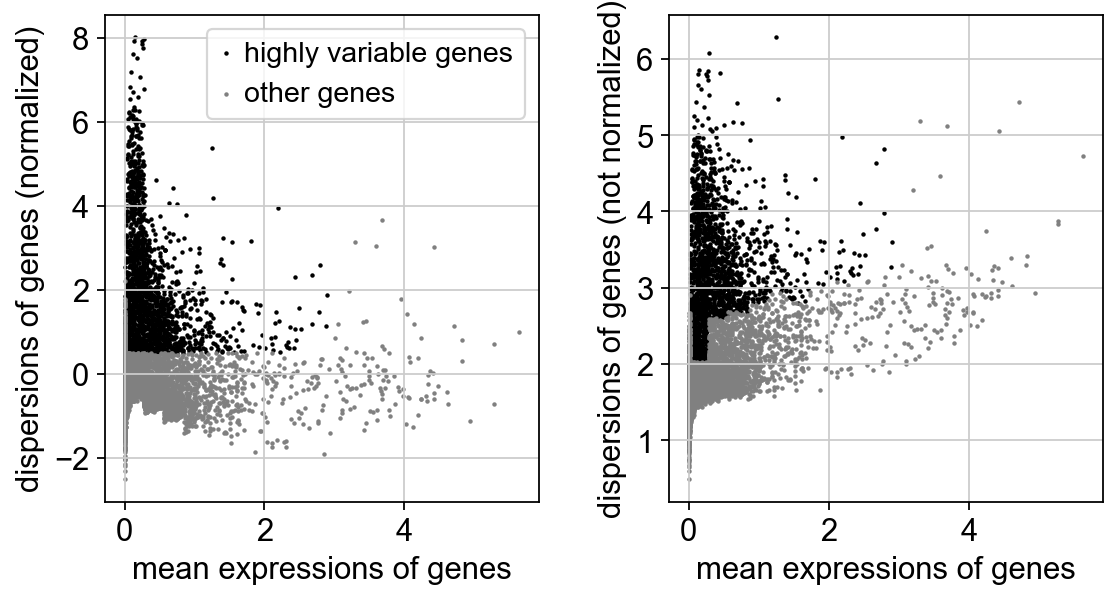

In [26]:
sc.pl.highly_variable_genes(adata)

In [27]:
adata.raw = adata

In [28]:
adata = adata[:, adata.var.highly_variable] #filtering of highly variable genes

In [29]:
sc.pp.regress_out(adata, ["total_counts", "pct_counts_mt"])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use


C:\Users\navarrou\.conda\envs\scanpy_env\Lib\site-packages\scanpy\preprocessing\_simple.py:668: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


    finished (0:00:07)


In [30]:
sc.pp.scale(adata, max_value=10)

computing PCA
    with n_comps=50
    finished (0:00:02)


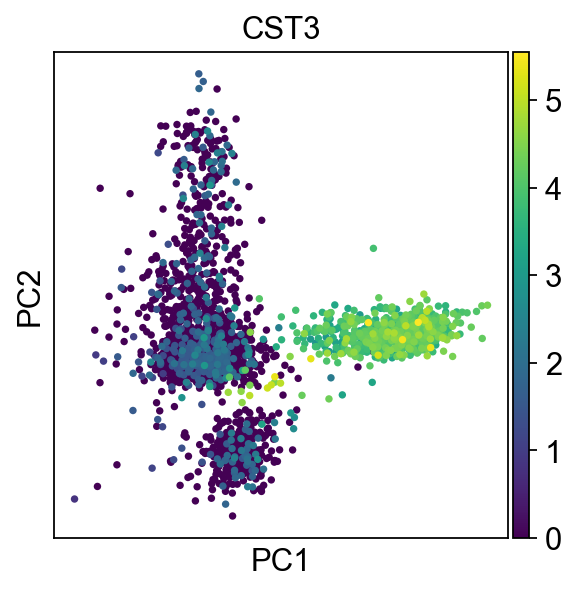

In [31]:
#PCA
sc.tl.pca(adata, svd_solver="arpack")
sc.pl.pca(adata, color="CST3")

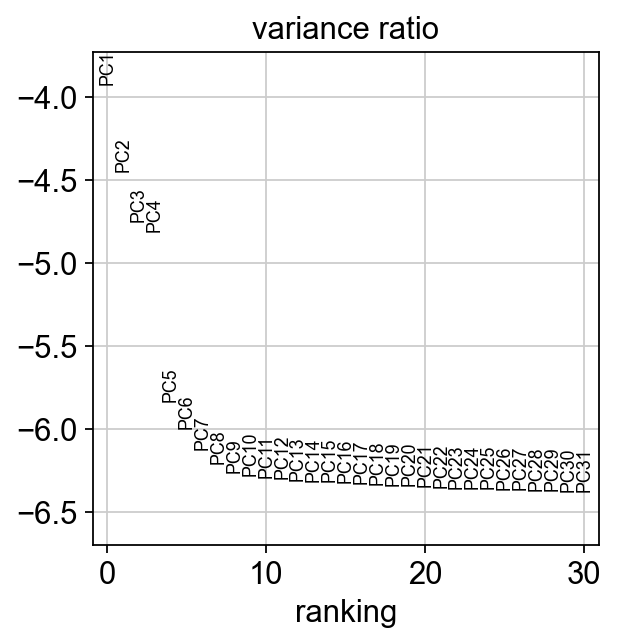

In [32]:
sc.pl.pca_variance_ratio(adata, log=True)

In [33]:
# save your adata object to the specified file path.
results_file =  "C:/Users/navarrou/Documents/RNA seq practice/databases.h5ad"
adata.write(results_file)

In [34]:
adata

AnnData object with n_obs × n_vars = 2686 × 1856
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'gene_ids', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [35]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40) #neighbothood graph  helps to represent relationships between cells based on their similarities 

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)


In [36]:
pip install python-igraph

Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install leidenalg

Note: you may need to restart the kernel to use updated packages.


In [38]:
sc.tl.leiden(adata, resolution=1.0)


running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


In [39]:
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata, init_pos='paga')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:04)


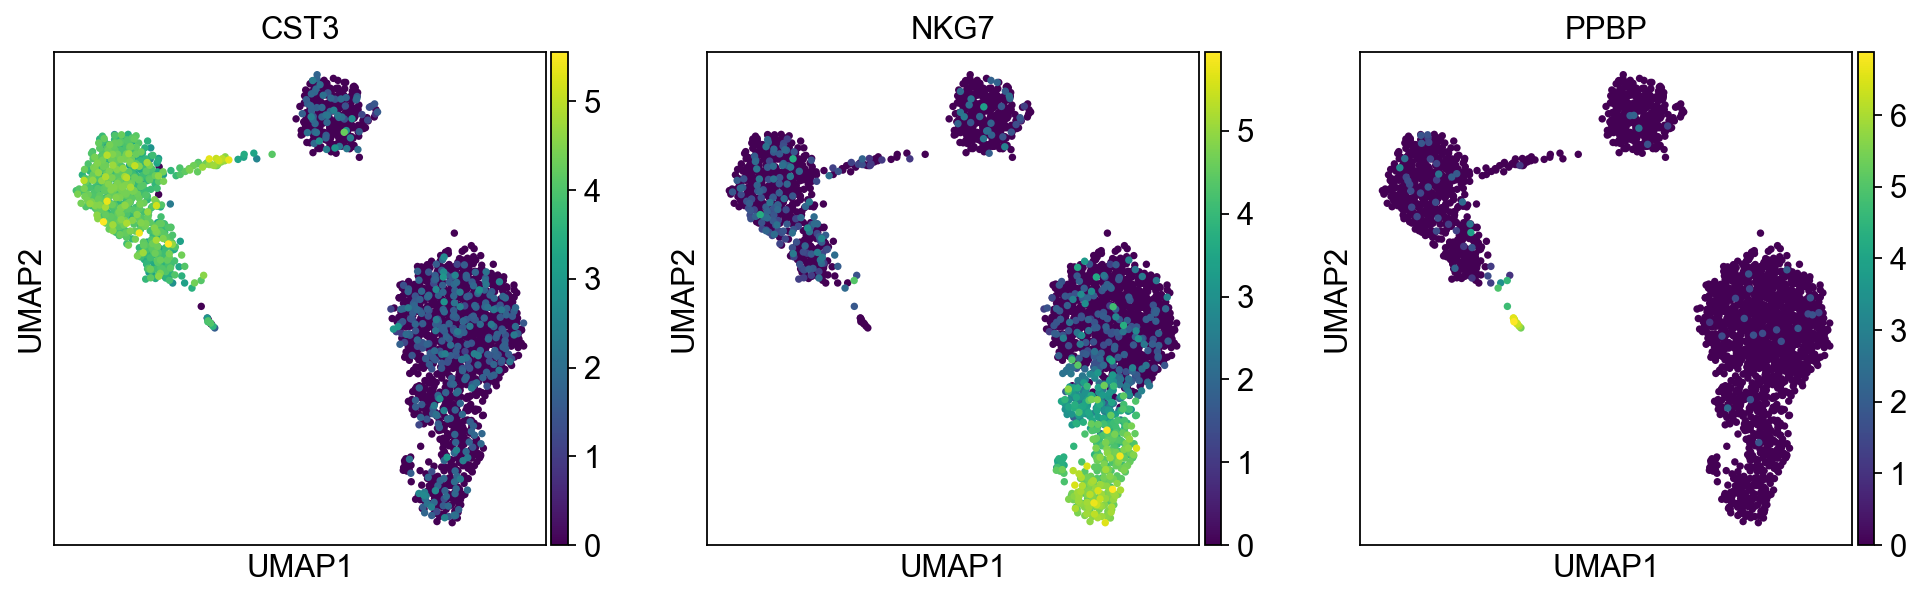

In [40]:
sc.pl.umap(adata, color=["CST3", "NKG7", "PPBP"])

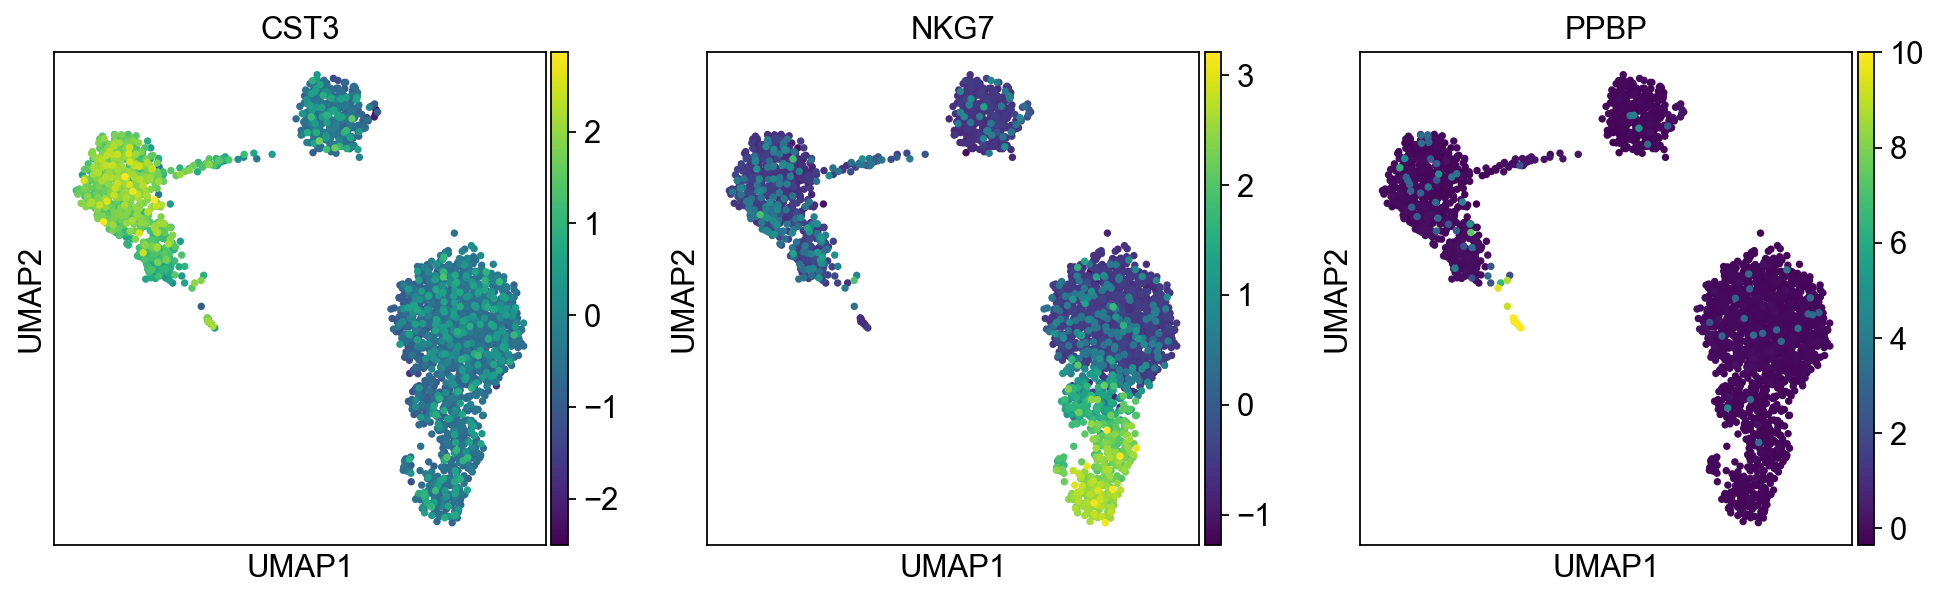

In [41]:
sc.pl.umap(adata, color=["CST3", "NKG7", "PPBP"], use_raw=False)

In [42]:
sc.tl.leiden(
    adata,
    resolution=0.9,
    random_state=0,
    flavor="igraph",
    n_iterations=2,
    directed=False,
)

running Leiden clustering


Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 142

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 142

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 142

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 142

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 142

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 142

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 142

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 142

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 142

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 142

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 142

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 142

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 142

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 142

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 142

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 142

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 142

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 142

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 142

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (most recent call last):
  File "numpy\\random\\mtrand.pyx", line 796, in numpy.random.mtrand.RandomState.randint
  File "numpy\\random\\_bounded_integers.pyx", line 1423, in numpy.random._bounded_integers._rand_int32
ValueError: high is out of bounds for int32
Exception ignored in: <class 'ValueError'>
Traceback (m

    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:44)


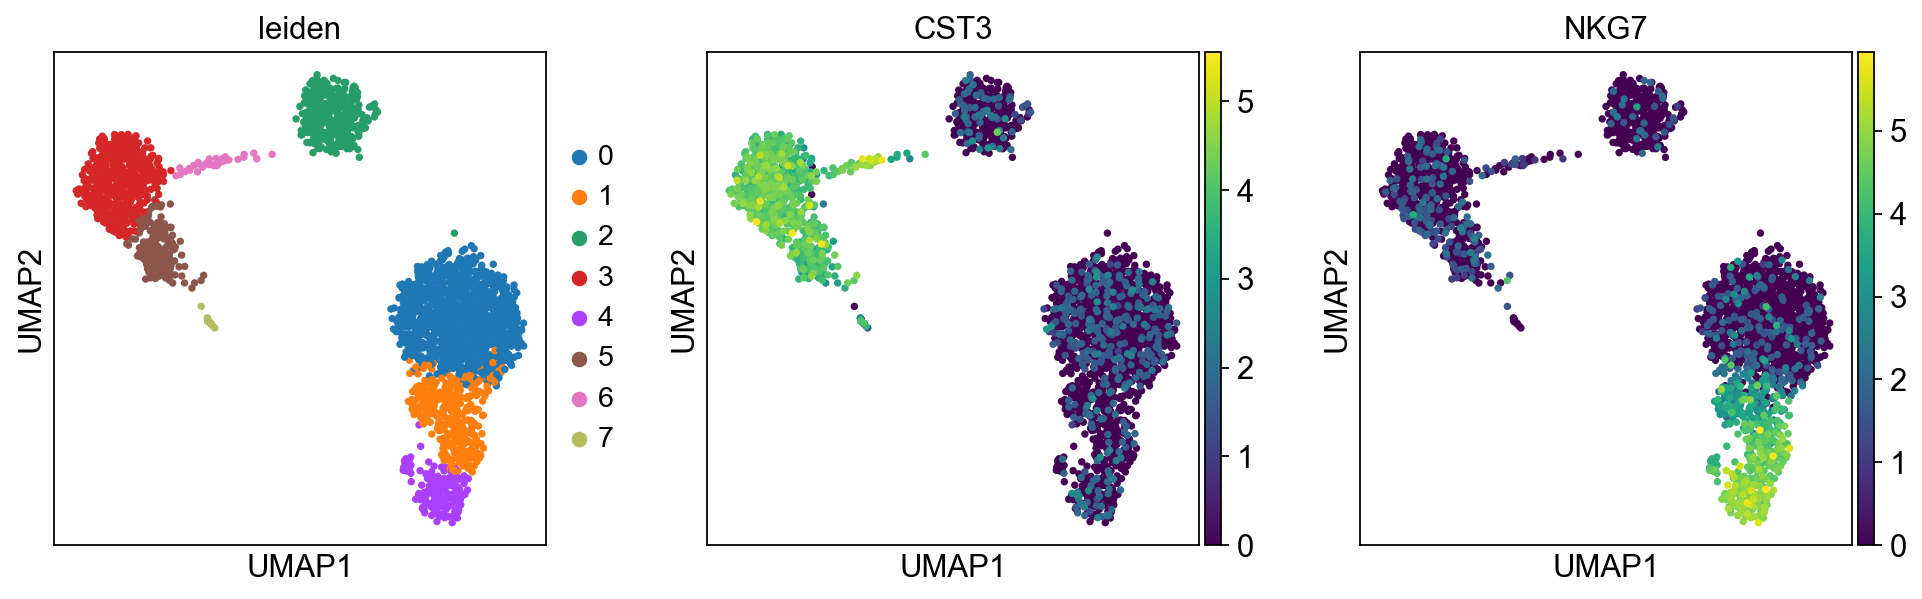

In [43]:
sc.pl.umap(adata, color=["leiden", "CST3", "NKG7"])

In [44]:
adata.write(results_file)

In [45]:
!pip install nbformat

Defaulting to user installation because normal site-packages is not writeable


In [46]:
!which python 

'which' is not recognized as an internal or external command,
operable program or batch file.
